# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
1. The estimated value for $\langle r \rangle $ is in agreement with the true value within $2$ sigmas.

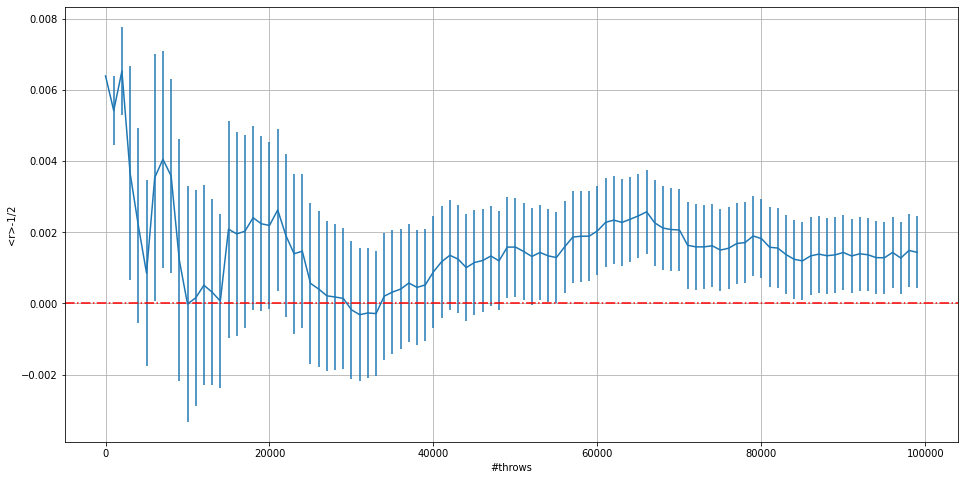

In [64]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math

# Function for statistical uncertainty estimation
def error(AV,AV2,n): 
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

# importo i numeri generati  
filename='random_numbers106.txt'
file=open(filename)
rawdatas=file.readlines()
RandomNumbers=np.zeros(len(rawdatas))
RandomNumbers=[float(rawdatas[i].strip('\n')) for i in range(0,len(RandomNumbers))]


M=10**5               # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += RandomNumbers[k]
    ave[i] = sum/L       # r_i 
    av2[i] = (ave[i])**2 # (r_i)^2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
x*=L # Number of throws = block * (Number of throws in each block)

plt.figure( figsize=(16,8) )
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.axhline(y=0, color='r', linestyle='-.')
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()



2. The estimated value for $\sigma^2 = \int_0^1 (r-1/2)^2 dr$ is in agreement with the true value within $1$ sigma

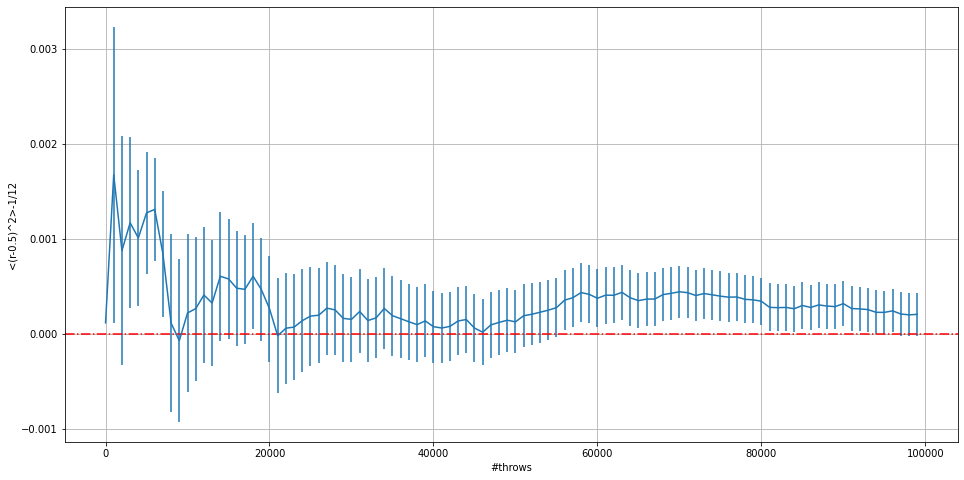

In [37]:
# Standard Deviation
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += (RandomNumbers[k]-0.5)**2 # Accumulate measures
    ave[i] = sum/L           # Estimate in each block 
    av2[i] = (ave[i])**2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] 
        su2_prog[i] += av2[j] 
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
plt.figure( figsize=(16,8) )
plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.axhline(y=0, color='r', linestyle='-.')
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

Each realization of $\chi^2$ does not lie far from the expected value $\chi^2=100$. As shown below, the mean value of the plotted distribution of $\chi$ is $\hat\chi^2 \sim 99.78$, and the expected value 100 is within $1$ sigma of the estimated value of $\chi$.

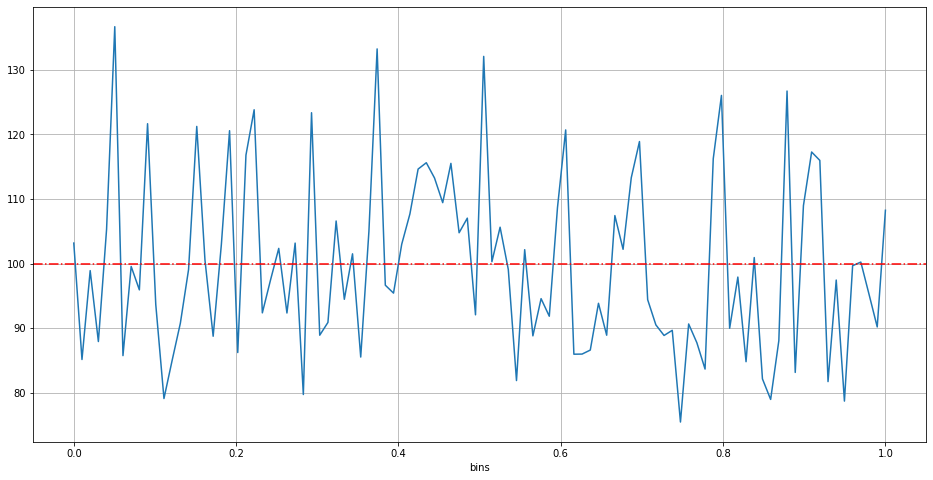

Average of chi:  99.78040000000003 0.5778671145240248


In [59]:
# Chi_Squared
def ThisBin(number, binsize, endpoint):
    #this functions returns the bin the variable "number" is in 
    #print("# of Bins: "+ str(int(endpoint/binsize))
    this_bin=0
    if (number<endpoint-binsize):
        return ThisBin(number, binsize, endpoint-binsize)
    else:
        this_bin = endpoint/binsize
        #print(this_bin, int(round(this_bin)) )
        return int(round(this_bin))

M=100
p=1./M
n=10**4

x = np.arange(M)      # [0,1,2,...,N-1]
intervals=np.zeros(M)
chi = np.zeros(M)
ave_chi, av2_chi = 0, 0


for j in range(int(n/M)):
    sum = 0
    intervals=np.zeros(M)
    for k in range(n):
        intervals[ThisBin(RandomNumbers[k+j*n], 1./M, 1)-1]+=1
        
    for k in range(M):
        sum += (intervals[k]-n/M)**2 # Accumulate measures
    #print(j,sum)
    chi[j] = sum/(M)
    #chi2[j]=chi[j]*chi[j]
    ave_chi+=chi[j]/(n/M)
    av2_chi+=ave_chi**2

plt.figure( figsize=(16,8) )
plt.xlabel('bins')
#plt.ylabel(r'\Chi')
plt.plot(np.linspace(0,1,100),chi)
plt.axhline(y=100, color='r', linestyle='-.')
plt.grid(True)
plt.show()
print('Average of chi: ', ave_chi, math.sqrt((av2_chi - ave_chi**2)/int(n/M))/(ave_chi)   )

### Exercise 01.2
I added to the random generator provided two methods to generate random numbers distributed according to Cauchy-Lorentz distribution or Exponential distribution, by means of the inverse of the CDF. Then the plots below shows clearly that the sum of both uniformly and exponentially distributed is a random variable whose distribution approach the gaussian in the limit of increasing population.

Instead, the sum of Cauchy-Lorentz distributed random number does not change considerably increasing the size of the population, suggesting that its limit distribution is not gaussian. Comparison with gaussian shows in particular fat tails, typical of power laws, whose basin of attraction is not gaussian.

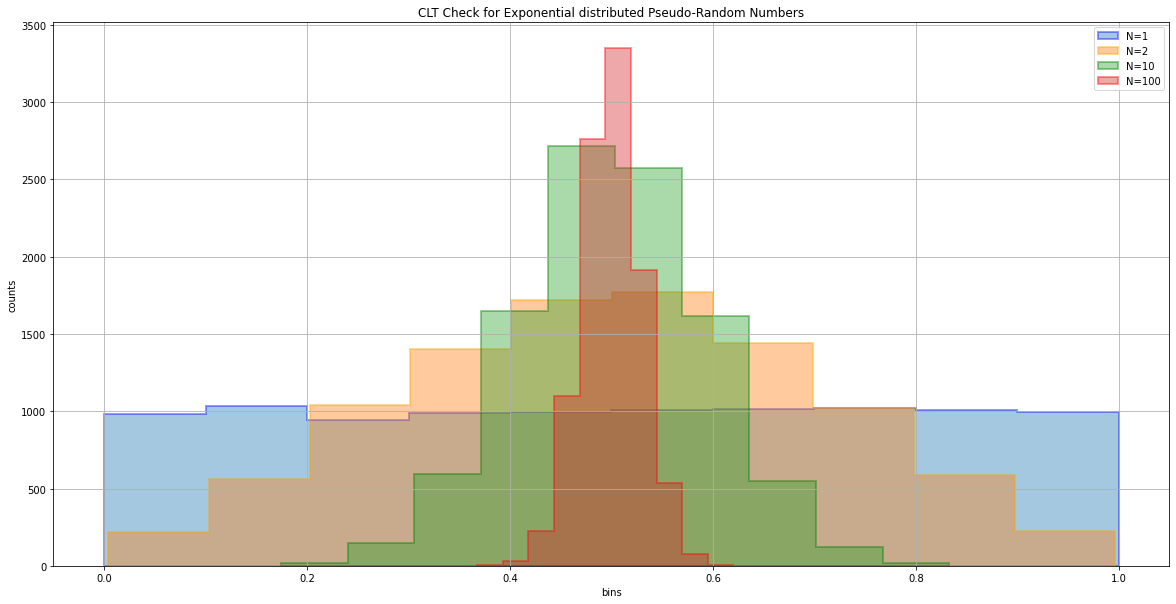

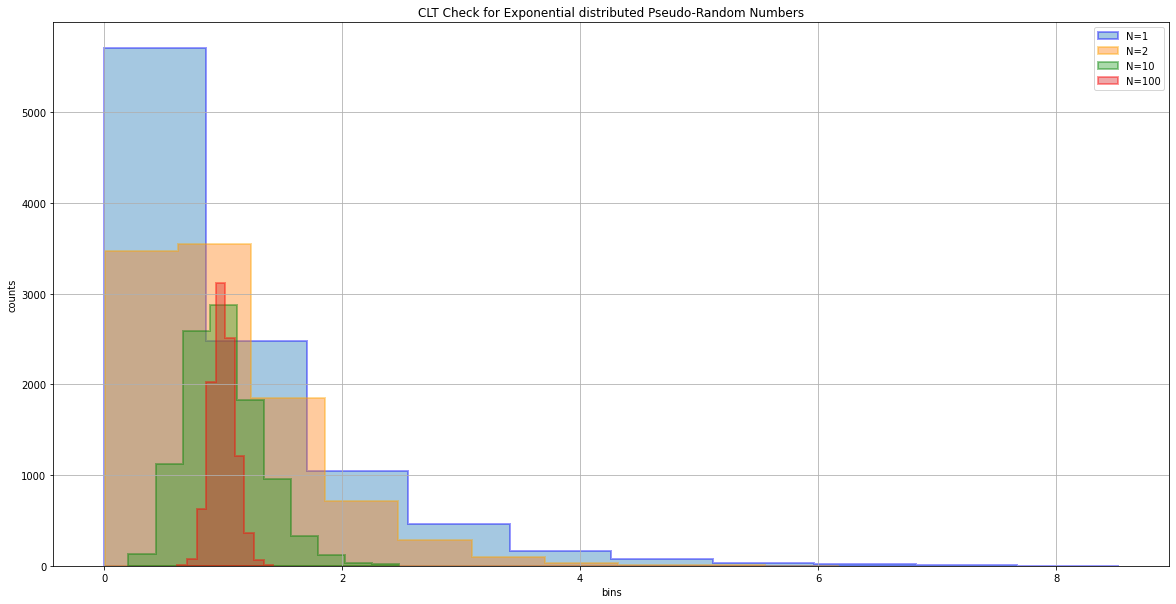

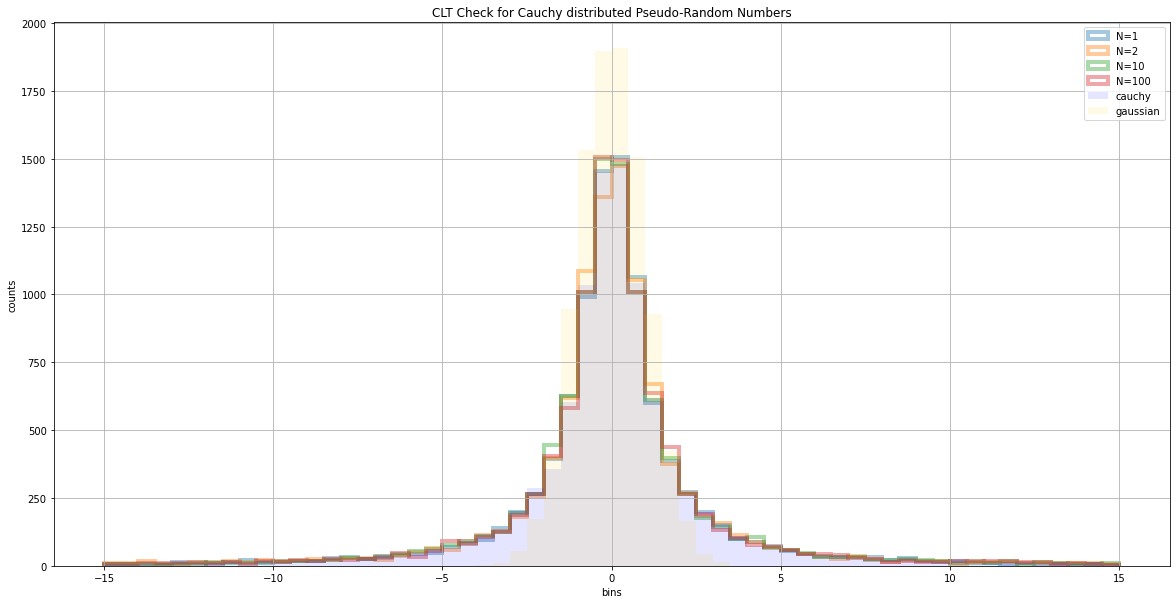

In [43]:
# importo i numeri generati  
filename='1.2/random_exponential.txt'
file=open(filename)
rawdatas=file.readlines()
ExpRandomNumbers=np.zeros(len(rawdatas))
ExpRandomNumbers=[float(rawdatas[i].strip('\n')) for i in range(0,len(RandomNumbers))]

filename='1.2/random_cauchylorentz.txt'
file=open(filename)
rawdatas=file.readlines()
CLRandomNumbers=np.zeros(len(rawdatas))
CLRandomNumbers=[float(rawdatas[i].strip('\n')) for i in range(0,len(RandomNumbers))]

colors=['blue', 'orange', 'green', 'red']

# Test CLT for Uniformly distributed Pseudo-Random Numbers
plt.figure( figsize=(20,10) )
color=0
for i in [1,2,10,100]:
    S_N=np.zeros(10**4)
    for j in range(i):
        #print(j)
        for k in range(10**4):
            S_N[k]+=RandomNumbers[k+j*10**4]
    plt.hist(S_N/i, alpha=0.4,histtype='stepfilled', lw=2, edgecolor=colors[color],label='N='+str(i))
    color+=1

plt.title("CLT Check for Exponential distributed Pseudo-Random Numbers")
plt.xlabel('bins')
plt.ylabel('counts')
plt.grid(True)
plt.legend()
plt.show()



# Test CLT for Exponential distributed Pseudo-Random Numbers
plt.figure( figsize=(20,10) )
color=0
for i in [1,2,10,100]:
    S_N=np.zeros(10**4)
    for j in range(i):
        #print(j)
        for k in range(10**4):
            S_N[k]+=ExpRandomNumbers[k+j*10**4]
    plt.hist(S_N/i, alpha=0.4,histtype='stepfilled', lw=2, edgecolor=colors[color],label='N='+str(i))
    color+=1

plt.title("CLT Check for Exponential distributed Pseudo-Random Numbers")
plt.xlabel('bins')
plt.ylabel('counts')
plt.grid(True)
plt.legend()
plt.show()

# Test CLT for Cauchy-Lorentz distributed Pseudo-Random Numbers
plt.figure( figsize=(20,10) )
color=0
for i in [1,2,10,100]:
    S_N=np.zeros(10**4)
    for j in range(i):
        for k in range(10**4):
            S_N[k]+=CLRandomNumbers[k+j*10**4]
    plt.hist(S_N/i,bins=60, alpha=0.4, range=(-15,15), histtype='step', lw=4, label='N='+str(i))
    
    
s = np.random.standard_cauchy(10000)
plt.hist(s,bins=60, alpha=0.1, range=(-15,15),histtype='stepfilled',label='cauchy',color='blue')
g = np.random.standard_normal(10000)
plt.hist(g,bins=60, alpha=0.1, range=(-15,15),histtype='stepfilled',label='gaussian', color='gold')

plt.title("CLT Check for Cauchy distributed Pseudo-Random Numbers")
plt.xlabel('bins')
plt.ylabel('counts')
plt.grid(True)
plt.legend()
plt.show()

### Exercise 01.3
In this exercise the needle is a ray (equivalence class of the radius of a circle) and the realization as a representative of the equivalence class. Each needle thrown is a pair of random number defining the center of the circle and a representative of the ray. If the representative crosses one of the thresholds, the counter Nhits gets incremented. Every $10$ thrown i calculated an estimate of $\pi$ and each block's size is $10^4$ thrown. 

$\pi$ estimation is in agreement with the true value within $2$ sigmas.

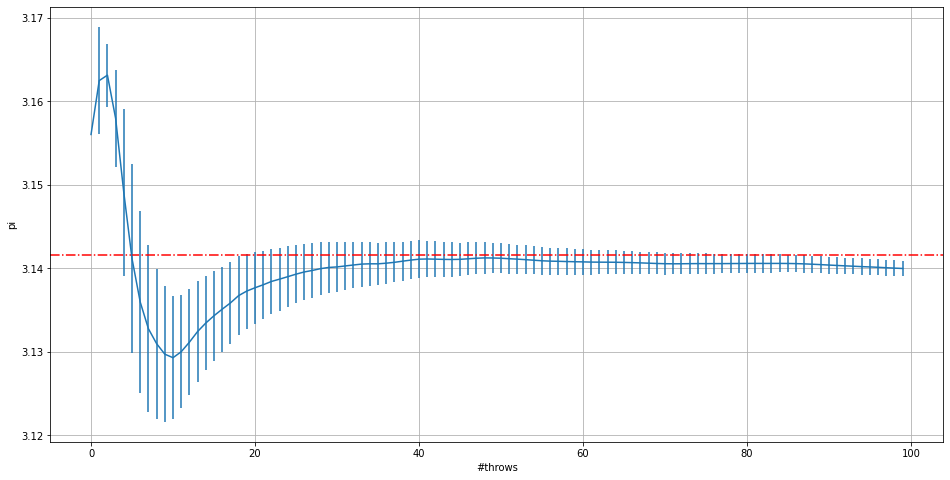

In [60]:
# Think about the needle as a ray (equivalence class of the radius of a circle) and the realization as a representative.

L=0.3
d=1.
experiment_size=10.

M=10**6               # Total number of throws
N=100                 # Number of blocks
R=int(M/N)            # Number of thrown in each block, please use for M a multiple of N

block_size=int(R/experiment_size) # block size expressed in number of measurements

ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)


Nhits, Nthrows, sum = 0, 0, 0
 
for i in range(N):
    sum=0
    for j in range(R):
        # extract the extremum of the needle which lies in the center of the circle:
        center=RandomNumbers[Nthrows]

        # extract an angle
        theta=2*math.pi*RandomNumbers[M-Nthrows-1]

        # check which representatives will cross the equally spaced lines:
        # it will cross if the y projection of the needle is:
        # above L: iff  Lsin(theta)>d-c (this case occurs for theta<pi )
        # below 0: iff -Lsin(theta)>c   (this case occurs for theta>pi )

        if ( (L*np.sin(theta)+center)*(L*np.sin(theta)-(d-center))>0 ):
            Nhits+=1

        Nthrows+=1
    
        # measurement
        if ( int(1.*(j+1)%experiment_size)==0 ):
            estimates = 2.*L*Nthrows/(d*Nhits)
            sum+=estimates
            
    ave[i] = sum/block_size       
    av2[i] = (ave[i])**2        

# block averaging
for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] 
        su2_prog[i] += av2[j] 
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
      
        
#print(ave)

#print(2.*L*Nthrows/(d*Nhits), block_size, sum/block_size)
plt.figure( figsize=(16,8) )
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.axhline(y=math.pi, color='r', linestyle='-.')
plt.xlabel('#throws')
plt.ylabel('pi')
plt.grid(True)
plt.show()